# Mall customers

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns


In [37]:
# Load the data
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")

In [80]:
# Convert Genre to numeric using LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['CustomerID'], axis=1))

# Perform K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Add cluster labels as a new column in the dataset
df['Labels'] = kmeans.labels_

# Print the first 10 rows of the updated dataset
print(df.head(10))

   CustomerID  Genre  Age  Annual_Income_(k$)  Spending_Score  Labels
0           1      1   19                  15              39       4
1           2      1   21                  15              81       3
2           3      0   20                  16               6       1
3           4      0   23                  16              77       0
4           5      0   31                  17              40       1
5           6      0   22                  17              76       0
6           7      0   35                  18               6       1
7           8      0   23                  18              94       0
8           9      1   64                  19               3       4
9          10      0   30                  19              72       0


In [66]:
X = scaler.fit_transform(df.drop(['CustomerID'], axis=1))
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 4, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 4, 3, 4, 2, 1, 2, 4,
       3, 4, 3, 4, 3, 4, 3, 1, 2, 1, 2, 4, 3, 1, 3, 1, 3, 1, 3, 4, 2, 1,
       3, 1, 3, 1, 1, 3, 3, 4, 1, 2, 3, 2, 3, 2, 1, 2, 2, 4, 3, 3, 2, 4,
       3, 3, 4, 1, 2, 3, 3, 3, 2, 4, 3, 4, 1, 3, 2, 4, 2, 3, 1, 2, 3, 1,
       1, 3, 3, 4, 2, 3, 1, 4, 3, 1, 2, 4, 1, 3, 2, 4, 2, 1, 3, 2, 2, 2,
       2, 1, 3, 4, 1, 1, 3, 3, 3, 3, 4, 3, 1, 4, 1, 1, 0, 4, 2, 4, 0, 4,
       1, 1, 0, 1, 0, 4, 0, 1, 0, 4, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 4], dtype=int32)

In [81]:
df["Labels"]

0      4
1      3
2      1
3      0
4      1
      ..
195    0
196    2
197    3
198    2
199    3
Name: Labels, Length: 200, dtype: int32

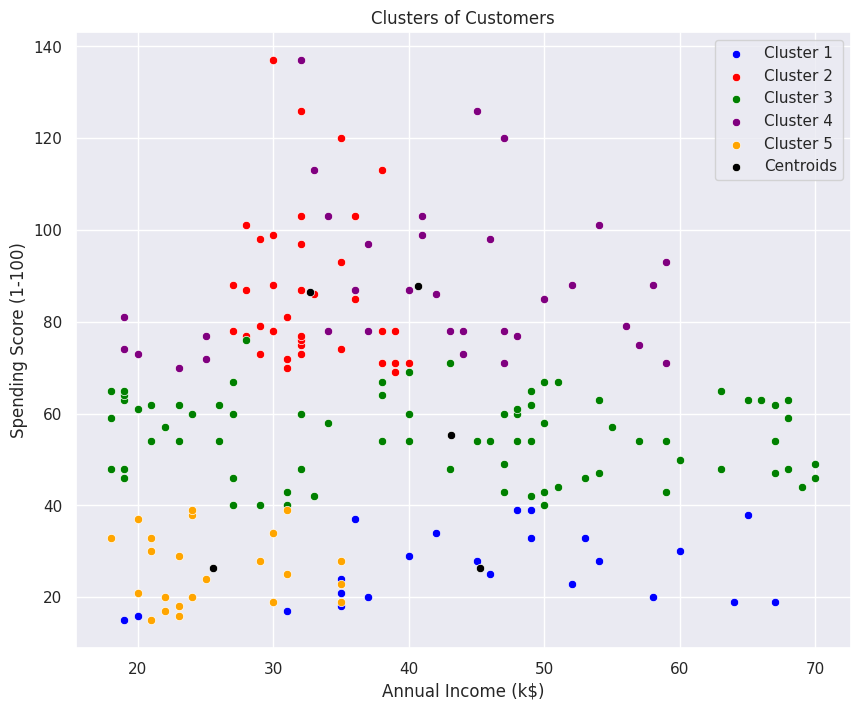

The average silhouette_score is : 0.44477051471288653


In [74]:
data = df

# Encode Gender variable
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

# Perform K-Means Clustering
X = data.iloc[:, 2:].values
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add a new column with cluster labels
data['Labels'] = y_kmeans

# Visualize the clusters
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='blue', label='Cluster 1')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='red', label='Cluster 2')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3')
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='purple', label='Cluster 4')
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='orange', label='Cluster 5')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the k-means clustering
silhouette_avg = silhouette_score(X, y_kmeans)

print("The average silhouette_score is :", silhouette_avg)

there is a moderate amount of overlapping between clusters, which means that the data points in one cluster have some similarity with the data points in other clusters as well. The clustering algorithm has been somewhat successful in grouping similar data points together.


In [46]:
# Define the features and target variables
X = df.drop(['CustomerID', 'Labels'], axis=1)
y = df['Labels']

In [97]:
# ()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Create a Logistic Regression model and fit the data
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Create a Decision Tree Classifier model and fit the data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
# Create a Random Forest Classifier model and fit the data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Create a Naive Bayes Classifier model and fit the data
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [52]:
# Predict on test set using all models
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
nb_pred = nb.predict(X_test)

In [53]:
# Evaluate the accuracy of all models
lr_acc = accuracy_score(y_test, lr_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
nb_acc = accuracy_score(y_test, nb_pred)

In [54]:
# Print the accuracy of all models
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"Decision Tree Classifier Accuracy: {dt_acc:.2f}")
print(f"Random Forest Classifier Accuracy: {rf_acc:.2f}")
print(f"Naive Bayes Classifier Accuracy: {nb_acc:.2f}")

Logistic Regression Accuracy: 0.95
Decision Tree Classifier Accuracy: 0.90
Random Forest Classifier Accuracy: 0.97
Naive Bayes Classifier Accuracy: 0.80


Based on the accuracy scores, the random forest classifier performed the best (97% accuracy), followed by logistic regression (95% accuracy), decision tree classifier (90% accuracy), and Naive Bayes classifier (80% accuracy).

In [58]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score',
       'Labels'],
      dtype='object')

# Breast Cancer dataset

In [22]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [84]:
# Define the features and target variables
X = data.data
y = data.target

In [98]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [85]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

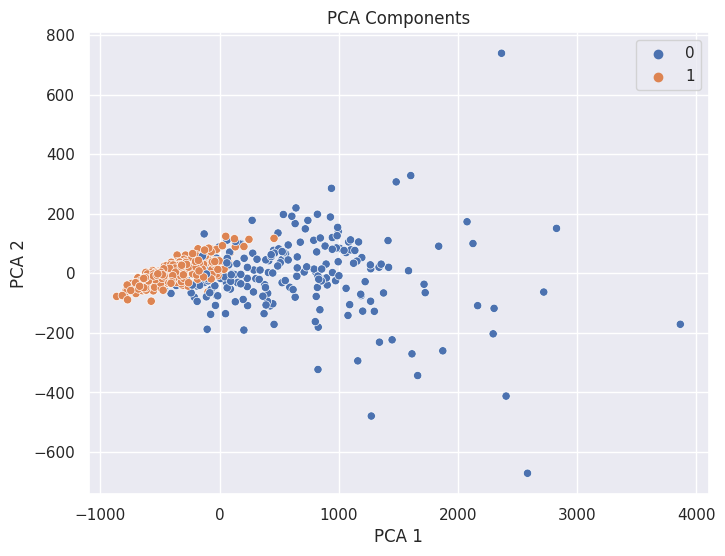

In [86]:
# Visualize the PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, legend='full')
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,8)})
plt.title('PCA Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [87]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [89]:
# Print maximum variance explained by PCA components
print(f"Maximum variance explained by PCA components: {sum(pca.explained_variance_ratio_)}")


Maximum variance explained by PCA components: 0.9982211613741719


In [93]:
# Perform LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

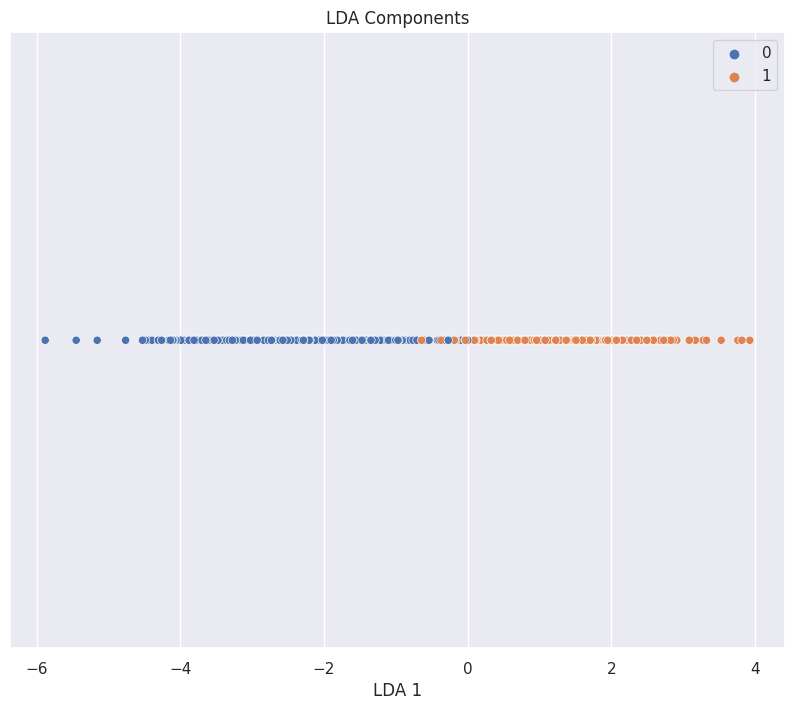

In [91]:
# Visualize the LDA components
sns.scatterplot(x=X_lda[:, 0], y=[0]*len(X_lda), hue=y, legend='full')
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,1)})
plt.title('LDA Components')
plt.xlabel('LDA 1')
plt.yticks([])
plt.show()

In [ ]:
# Print maximum variance explained by LDA componentslda.explained_variance_ratio_
print(f"Maximum variance explained by LDA components: {lda.explained_variance_ratio_[0]:.2f}")

Maximum variance explained by LDA components: 1.00


we have: <br/>
<code>
pca.explained_variance_ratio_ = array([0.98204467, 0.01617649]) </code>
<br/> and <br/> 
<code>
Maximum variance explained by LDA components: 1.00
</code>

<p>The output of PCA pca.explained_variance_ratio_ = array([0.98204467, 0.01617649]) indicates that the first principal component explains 98.2% of the variance in the data, while the second principal component explains only 1.6% of the variance. This suggests that the breast cancer dataset may be well approximated by a lower-dimensional space, and that the first principal component captures most of the important information in the data.</p>

<p>The output of LDA Explained variance ratio (using LDA method) = [1.] indicates that the one linear discriminant generated by LDA explains all of the variance in the data. This suggests that LDA is able to perfectly separate the classes in the breast cancer dataset using only one linear discriminant.
</p>


<p>PCA is useful for exploring the underlying structure of the data and identifying the most important features, while LDA is useful for classification tasks where the goal is to separate the classes as much as possible. <strong> So, in this case LDA is more useful </strong> </p>